In [4]:
%matplotlib inline

#Chapter 5 Homework

## Computational Physics

## James O. Thomas

## Exercise 5.1:

In the on-line resources you will find a file called velocities.txt, which contains two columns of numbers, the first representing time $t$ in seconds and the second the $x$-velocities in meters per second of a particle, measured once every second from $ t = 0 $ to $t=100$. Write a program to do the following:

a) Read in the data and, using the trapezoidal rule, calculate from the approximate distance traveled by the particle in the $x$ direction as a function of time. See Section 2.4.3 on page 57 if you want a reminder of how to read data from a file.

b) Extend your program to make a graph that shows, on the same plot, both the original velocity curve and the distance traveled as a function of time.

In [3]:
# Solution to Exercise 5.1
'''
Program to calculate the distance traveled (in 1 dimensiton) of a particle
Input:
    velocity as a function of time from velocities.txt
Output
    distance traveled
    
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

times, velocities = np.loadtxt('velocities.txt', unpack = True)

a = times[0]          # as defined in the problem
B = times[len(times)-1]
N = len(times)-1
h = (B-a)/N

def JIntegrate(b):
    I = 0.5*velocities[0] + 0.5* velocities[b]
    for i in range(1,b):
        I = I + velocities[i]
    return I


X100 = JIntegrate(len(velocities)-1)
print('the final is approximately ', X100)

the final is approximately  8.218924


## Solution to 5.1 a)

Running the above code yields a final position of about 8.2 meters.

[]

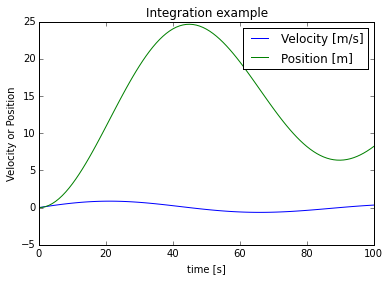

In [17]:
# Solution to Exercise 5.1
'''
Program to calculate the distance traveled (in 1 dimensiton) of a particle
Input:
    velocity as a function of time from velocities.txt
Output
    distance traveled
    
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

times, velocities = np.loadtxt('velocities.txt', unpack = True)

a = times[0]          # as defined in the problem
B = times[len(times)-1]
N = len(times)-1
h = (B-a)/N

def JIntegrate(b):
    I = 0.5*velocities[0] + 0.5* velocities[b]
    for i in range(1,b):
        I = I + velocities[i]
    return I

Xs = np.empty(len(times))
i = 0
for t in times:
    Xs[i]=JIntegrate(int(t))
    i = i + 1
    

plt.figure()
plt.plot(times,velocities, label = 'Velocity [m/s]')
plt.plot(times,Xs, label = 'Position [m]')
plt.xlabel('time [s]')
plt.ylabel('Velocity or Position')
plt.title('Integration example')
plt.legend()
plt.plot()

##Exercise 5.2: 

a) Write a program to calculate the value for the integral $\int^2_0 \left( x^4 - 2x +1 \right) dx $ from Example 5.1, but using Simpson's rule with 10 slices instead of the trapezoidal rule. you may wish to base your program on the trapezoidal rule program on page 142.

b) Run the program and compare your result to the known corret value of 4.4. What is the fractional error on your calculation?

c) Modify the program to use a hundred slices instead, then a thousand. Note the improvement in the result. How do the results compare with those from Example 5.1 for the trapezoidal rule with the same numbers of slices?

In [4]:
# Solution to exercise 5.2

'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def f(x):
    return x**4 - 2*x + 1

N = 1000
a = 0.0
b = 2.0
h = (b-a)/N

I = f(a) + f(b)
for k in range(1,N,2):
    I = I + 4*f(a+k*h)
for k in range(2,N,2):
    I = I + 2*f(a+k*h)
    
I = 1./3.*h*I
error = abs((4.4-I)/4.4*100)

print('the approximate value of the integral is ',I)
print('the percent error is ', error)

the approximate value of the integral is  4.400000000004266
the percent error is  9.695274885953866e-11


## Solution to 5.2

* When I run the code for 10 steps I get a solution of about 4.4004. The percent error is about 0.01% which is significantly better than the 2% error found using the trapezoidal rule.

* When I run the code for 100 steps I get a solution of 4.1000000427. The percent error is aobut $1 \times 10^{-6}$ which is about 4 orders of magnitude better than the solution found using the trapezoidal rule.

* When I run the code for 1000 steps I get a percent error of about $1 \times 10^{-10}$ which is about 7 orders of magnitude better than the solution found using the trapezoidal rule.

These results indicate that using Simpson's rule to approximate integrals yields significantly better results for the same number of steps than using the trapezoidal rule. 

## Exercise 5.3:

Consider the integral

$$E(x) = \int^x_0 e^{-t^2} dt.$$

a) Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

b) When you are convinced your program is working, extend it further to make a graph of $E(x)$ as a function of $x$. If you want to remind yourself of how to make a graph, you should consult Section 3.1, starting of page 88.

Note that there is no known way to perform this particular integral analytically, so numerical approaches are the only way forward.

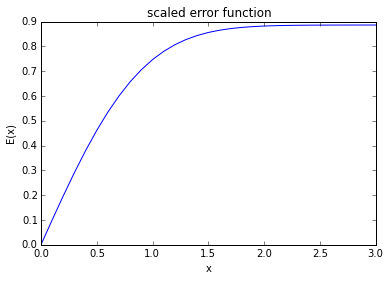

In [8]:
# Solution to 5.3
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def f(t):
    return np.exp(-t*t)

def JIntegrate(b):
    # performs the integration according to Simpson's rule
    a = 0.0
    N = 1000
    h = (b-a)/N
    I = f(a) + f(b)
    for k in range(1,N,2):
        I = I + 4*f(a+k*h)
    for k in range(2,N,2):
        I = I + 2*f(a+k*h)
    I = 1./3.*h*I
    return I

Xs = np.arange(0,3.1,0.1)
Es = JIntegrate(Xs)

plt.figure()
plt.plot(Xs,Es)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.title('scaled error function')
plt.figure()

## Solution to 5.3

This problem can be compared with known values by noticing that the given integral closely resembles the error function. 

$$erf(x) = \frac{2}{\sqrt{ \pi }} \int_0 ^x e^{-t^2}dt $$

The only difference is the factor of $\frac{2}{\sqrt{ \pi }}$ in the beginning. This means that the answers found here should resemble a scaled version of the error function.

a) I chose 1000 slices in order to make the program run quickly on my computer. More slices could be used if necessary.

b) The graph resembles the right half of the error function.

## Exercise 5.9: Heat capacity of a solid

Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be

$$ C_v = 9V\rho k_B \left( \frac{T}{\theta _D} \right) ^3 \int_0^{\theta _D/T} \frac{x^4e^x}{(e^x-1)^2}dx $$

where $V$ is the volume of the solid, $\rho $ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta _D$ is the so-called *Debye temperature*, a property of solids that depends on their density and speed of sound.

a) Write a Python function cv(T) that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number density of $\rho = 6.022 \times 10^{28} \rm{m} ^{-3}$ and a Debye temperature of $\theta _D = 428 K$. use Gaussian quadruture to evaluate the integral, with $N=50$ sample points.

b) use your function to make a graph of the heat capacity as a function of temperature from $T=5$K to $T=500$K.

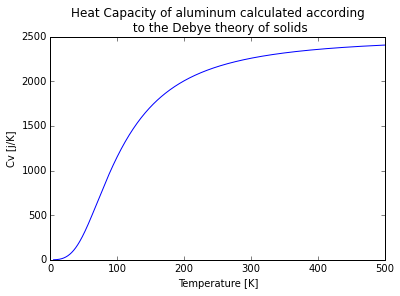

In [20]:
# Solution to 5.9
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
import scipy.integrate as integrate

V = 1000/100**3  # m^3 volume
rho = 6.022e28   # number density of aluminum
k_b = 1.380648813e-23   # j/K boltzman constant from wikipedia
theta_D = 428    # K

def cv(T):
    a = 9*V*rho*k_b*(T/theta_D)**3
    b, err = integrate.quad(lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2, 0, theta_D/T)
    return a*b

Ts = np.arange(5,501,1)
CVs = np.empty(len(Ts))

# CVs = cv(Ts) # issue with integrate.quad

i = 0
for T in Ts:
    CVs[i] = cv(T)
    i = i + 1

plt.figure()
plt.plot(Ts,CVs)
plt.xlabel('Temperature [K]')
plt.ylabel('Cv [j/K]')
plt.title('Heat Capacity of aluminum calculated according  \n to the Debye theory of solids')
plt.show()

## Solution to 5.9

The above code generates the heat capacity for aluminum. It is notable that the array of Cvs cannot be filled as a vectory because of an issue with integrate.quad checking for infinite limits. Therefore I filled the array using a loop.

## Exercise 5.12: the Stefan-Boltzmann constant

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega $ to $\omega + d\omega $, a black body of unit area radiates electromagnetically an amount of thermal evergy per socond equal to $I(\omega ) d\omega $, where

$$I(\omega ) = \frac{\hbar }{4 \pi ^2 c^2} \frac{\omega ^3}{\left( e^{\hbar \omega / k_BT} -1 \right)}$$

Here $\hbar $ is Planck's constant over $2 \pi $, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

a) Show that the total energy per unit area radiated by a black body is 

$$W = \frac{k_B^4T^4}{4 \pi ^2c^2 \hbar ^3} \int_0^\infty \frac{x^3}{e^x-1}dx$$

b) Write a program to evaluate the integral in this expression. Explain what method you used, and how accurate you think your answer is.

c) Even before Planck gave his thoery of thermal radiation around the turn of the 20th century, it was known that th total energy $W$ given off by a black body per unit area per second followed Stefan's law: $W = \sigma T^4$, where $\sigma $ is the Stefan-Boltzmann constant. Use your value for the integral above to compute a value for the Stefan-Boltzmann constant (in SI units) to three significant figures. Check your result against the nown value, which you can find in books or on-line. you should get good agreement.

## Solution to 5.12 a)

The total energy per unit area radiated by the black body is given by:

$$W = \int_0^\infty I(\omega ) d\omega $$

$$W = \int_0^\infty \frac{\hbar }{4 \pi ^2 c^2} \frac{\omega ^3}{e^{\hbar \omega / k_B T} - 1} d \omega $$

$$W = \frac{\hbar }{4 \pi ^2 c^2} \int_0^\infty \frac{\omega ^3}{e^{\hbar \omega / k_B T} - 1} d \omega $$

now we make a change of variables

$$x = \frac{\hbar \omega }{k_B T} \rightarrow \omega = \frac{xk_BT}{\hbar }$$

$$ d\omega = \frac{k_BT}{\hbar }dx$$

The limits of integration stay the same becasuse $\omega \rightarrow \infty $ as $ x \rightarrow \infty $ and $\omega \rightarrow 0 $ as $ x \rightarrow 0$. Plugging all of this in

$$ W = \frac{\hbar }{4 \pi ^2 c ^2} \int_0^\infty \frac{(xk_BT/\hbar )^3}{e^x-1} \frac{k_BT}{\hbar } dx$$

combining all of the constants we get

$$ W = \frac{k_B^4T^4}{4 \pi ^2 c^2 \hbar ^3} \int_0^\infty \frac{x^3}{e^x - 1} dx$$

which is exactly what we were looking for.

In [32]:
## Solution to 5.12 b)
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

k_B = 1.380648813e-23    # j/K from wikipedia
c = 299792458            # m/s
hbar = 1.05457180013e-34 # J*s from wikipedia

exact = np.pi**4/15

def Integrand(x):
    return x**3/(np.exp(x)-1)


# performs the integration according to Simpson's rule
a = 1e-6       # cant start at 0 bacuase that makes the integrand undefined
b = 1e4
N = int(1e6)
h = (b-a)/N
I = Integrand(a) + Integrand(b)
for k in range(1,N,2):
    I = I + 4*Integrand(a+k*h)
for k in range(2,N,2):
    I = I + 2*Integrand(a+k*h)
I = 1./3.*h*I

ans = I

error = exact - ans

frac_error = abs(error)/exact*100

print('the exact solution is ', exact)
print('the appriximated integral is ', ans)
print('the percent error is ', frac_error, '%')

the exact solution is  6.493939402266828
the appriximated integral is  6.49393940243
the percent error is  2.56597604866e-09 %


## solution to 5.12 b)

I chose to use Simpson's method to evaluate the integral from part a). I set the upper limit to 10000 instead of infinity (since any contributions from higher $x$ values are small) and used $10^6$ steps. This gives me an answer that is within a few parts per billion of the analytical solution.

In [18]:
# Solution to 5.12 c)
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

k_B = 1.380648813e-23    # j/K from wikipedia
c = 299792458            # m/s
hbar = 1.05457180013e-34 # J*s from wikipedia

exact = np.pi**4/15
sigma_known = 5.67037321e-8 # W/m^2/K^4 from wikipedia

def Integrand(x):
    return x**3/(np.exp(x)-1)


# performs the integration according to Simpson's rule
a = 1e-6       # cant start at 0 bacuase that makes the integrand undefined
b = 1e4
N = int(1e6)
h = (b-a)/N
I = Integrand(a) + Integrand(b)
for k in range(1,N,2):
    I = I + 4*Integrand(a+k*h)
for k in range(2,N,2):
    I = I + 2*Integrand(a+k*h)
I = 1./3.*h*I

sigma_calc = k_B**4/(4*np.pi**2*c**2*hbar**3)*I
percent_error = abs(sigma_calc-sigma_known)/sigma_known*100

print('the calculated value for the Stephan-Boltzman constant is ', sigma_calc)
print('the percent error is ', percent_error, '%')

the calculated value for the Stephan-Boltzman constant is  5.67037162982e-08
the percent error is  2.78673351809e-05 %


Using the value of the integral calculate in python, I get a value for the Stephan-Boltzmann constant of $\sigma \approx 5.67 \times 10^{-8}$ To three significant figures, this matches the accepted value for the Stephan-Boltzmann constant as found on wikipedia. 

## Exercise 5.15: 

Create a user-defined function f(x) that returns the value $1 + \frac{1}{2}\rm{tanh}2x$, then use a central difference to calculate the derivative of the function in the range $-2 \le x \le 2$. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. It may help to plot the exact answer as lines and the numerical ones as dots. (Hint: In Python the tanh function is found in the math package, and its called simply tanh.)

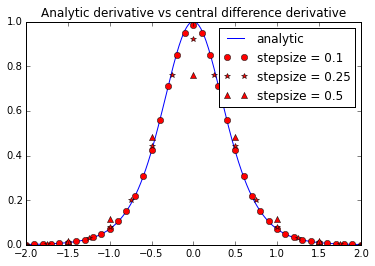

In [15]:
# Solution to exercise 5.15
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def f(x):
    return 1 + 0.5*np.tanh(2*x)

# analytic derivative 
xas = np.arange(-2,2.01,0.01)
analytic_derivative = (1/np.cosh(2*xas))**2

# central difference  
stepsize = 0.1
xs = np.arange(-2,2.+stepsize,stepsize)
derivative = np.zeros(len(xs))

for i in range(1,len(xs)-1):
    derivative[i]=(f(xs[i+1]) - f(xs[i-1]))/(2*stepsize)
    
stepsize2 = 0.25
xs2 = np.arange(-2,2.25,0.25)
derivative2 = np.zeros(len(xs2))

for i in range(1,len(xs2)-1):
    derivative2[i]=(f(xs2[i+1])-f(xs2[i-1]))/(2*stepsize2)
    
stepsize3 = 0.5
xs3 = np.arange(-2,2.5,0.5)
derivative3 = np.zeros(len(xs3))

for i in range(1,len(xs3)-1):
    derivative3[i]=(f(xs3[i+1])-f(xs3[i-1]))/(2*stepsize3)
    
plt.figure()
plt.plot(xas,analytic_derivative,'b-', label = 'analytic')
plt.plot(xs,derivative, 'ro', label = 'stepsize = 0.1')
plt.plot(xs2,derivative2, 'r*', label = 'stepsize = 0.25')
plt.plot(xs3,derivative3, 'r^', label = 'stepsize = 0.5')
plt.legend()
plt.xlim(-2,2)
plt.title('Analytic derivative vs central difference derivative')
plt.show()

To calculate the analytic derivative, we note that $\frac{d}{dx}tanhx = sech^2x$ and use the chain rule.

$$\frac{d}{dx} \left( 1+tanh(2x) \right) = \frac{1}{2}sech^2(2x)2 = sech^2(2x)$$

noting that $sech(x) = 1/cosh(x)$ we are able to write the analytic derivative as

$$\frac{d}{dx} \left( 1+tanh(2x) \right) = sech^2(2x) = \left( \frac{1}{cosh(2x)} \right)^2$$

Or we could have simply put it into mathematica or wolframalpha.com

It is clear from the above graph that when using a stepsize of 0.1, the analytic derivative matches the derivative found using the central difference formula quite well. Larger stepsizes will result in the results from the two methods will start to diverge, especially near where the function is changing the quickest (around $x=0$ in this case).